<a href="https://colab.research.google.com/github/Umang-Lodaya/Stock-Market-Trend-Prediction/blob/main/Stock_Market_Trend_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For reading stock data from yahoo
import yfinance as yf
from datetime import datetime
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader
yf.pdr_override()

In [88]:
# The tech stocks we'll use for this analysis
stock = 'TSLA'

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(2000, 1, 1)
start = '2020-01-01'

df = yf.download(stock, start, end)
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-02,186.740005,193.750000,186.009995,190.899994,190.899994,181500700
2023-03-03,194.800003,200.479996,192.880005,197.789993,197.789993,153800400
2023-03-06,198.539993,198.600006,192.300003,193.809998,193.809998,128100100
2023-03-07,191.380005,194.199997,186.100006,187.710007,187.710007,148125800
2023-03-08,185.039993,186.500000,180.000000,182.000000,182.000000,151897800
2023-03-09,180.250000,185.179993,172.509995,172.919998,172.919998,170023800
2023-03-10,175.130005,178.289993,168.440002,173.440002,173.440002,191007900
2023-03-13,167.460007,177.350006,163.910004,174.479996,174.479996,167790300
2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900


In [72]:
# Summary Stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000,3.200000e+03
mean,60.583184,61.959258,59.079715,60.550872,60.550872,9.502809e+07
std,95.981241,98.205411,93.489709,95.873043,95.873043,8.195258e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.360833,9.588833,9.105833,9.305167,9.305167,4.290150e+07
50%,16.403666,16.614667,16.153000,16.410666,16.410666,7.685850e+07
75%,29.341667,30.560500,28.599499,29.098001,29.098001,1.200986e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [73]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3200 entries, 2010-06-29 to 2023-03-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3200 non-null   float64
 1   High       3200 non-null   float64
 2   Low        3200 non-null   float64
 3   Close      3200 non-null   float64
 4   Adj Close  3200 non-null   float64
 5   Volume     3200 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 175.0 KB


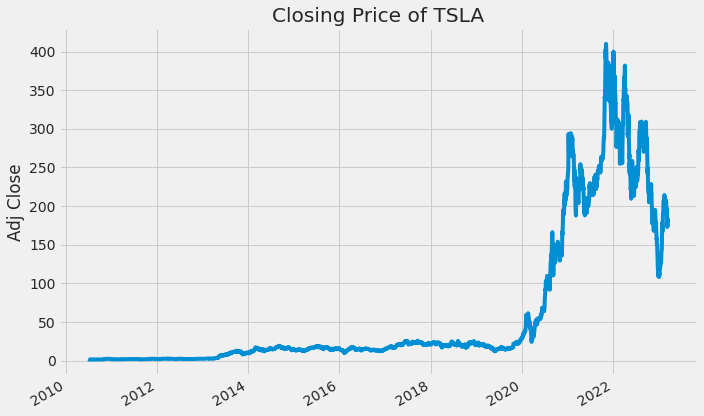

In [74]:
# Let's see a historical view of the closing price
plt.figure(figsize=(10, 6))
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of {stock}")
    
plt.tight_layout()
plt.show()

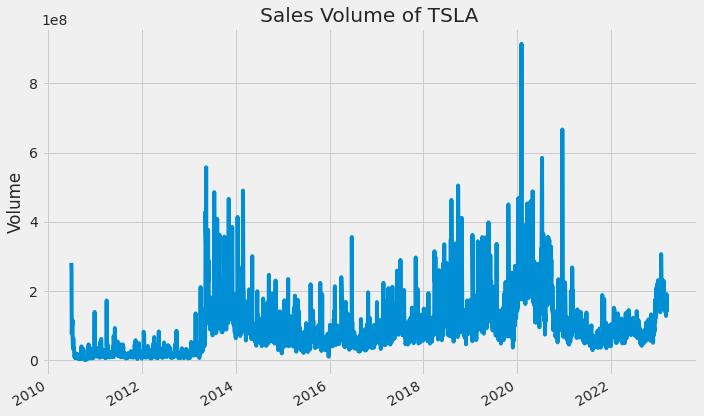

In [75]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(10, 6))
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume of {stock}")
    
plt.tight_layout()
plt.show()

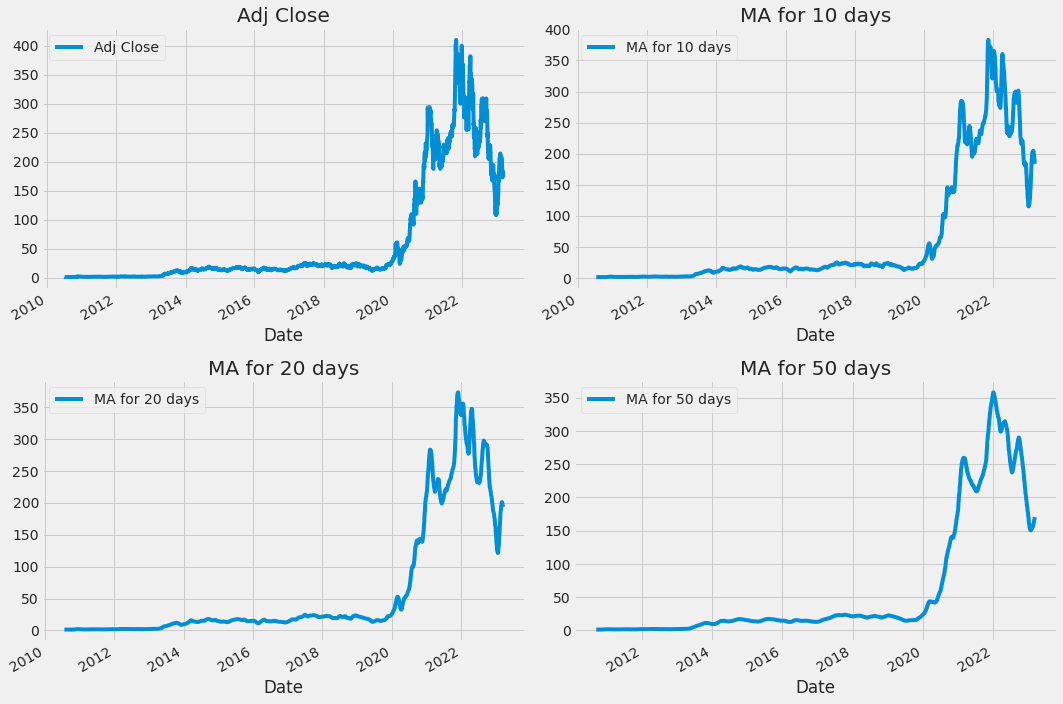

In [76]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

df[['Adj Close']].plot(ax=axes[0,0])
axes[0,0].set_title('Adj Close')

df[['MA for 10 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MA for 10 days')

df[['MA for 20 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MA for 20 days')

df[['MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('MA for 50 days')

fig.tight_layout()
plt.show()

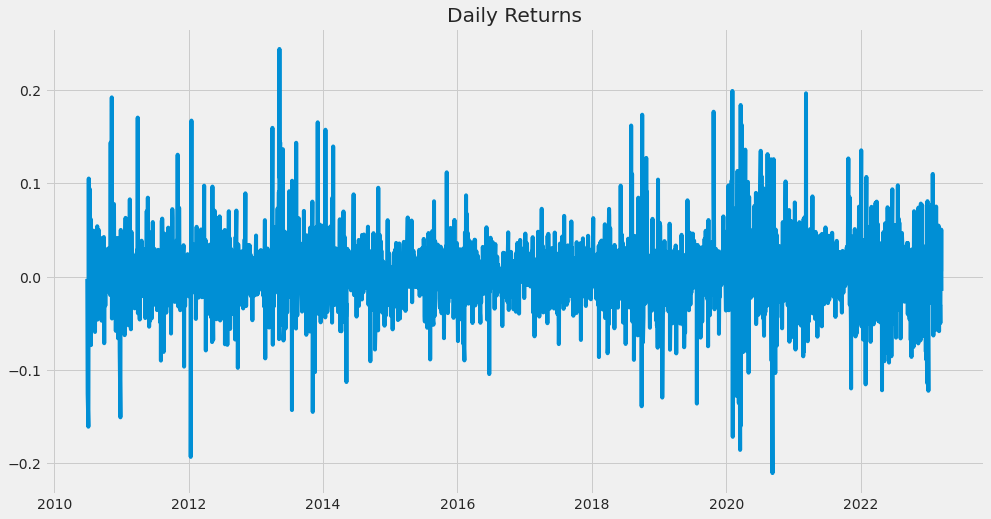

In [77]:
# We'll use pct_change to find the percent change for each day
df['Daily Return'] = df['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
plt.figure(figsize=(15, 8))
plt.plot(df['Daily Return'])
plt.title('Daily Returns')
plt.show()

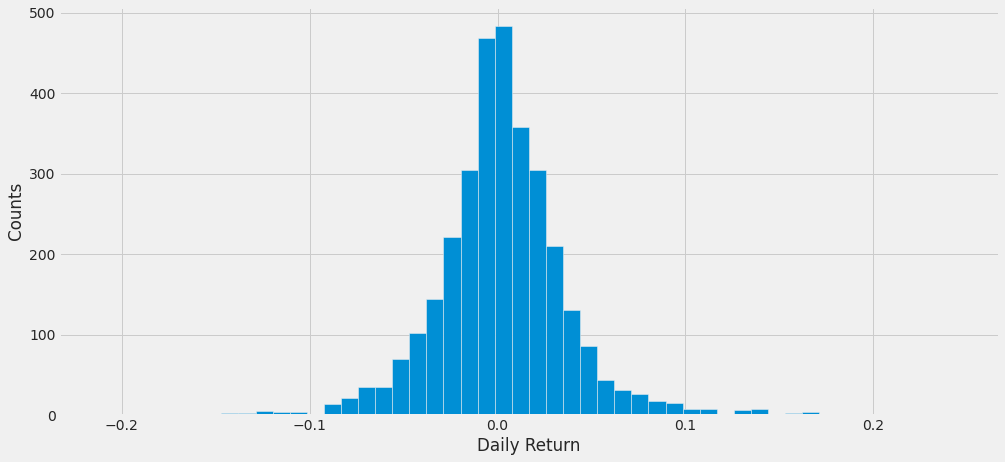

In [78]:
fig = plt.figure(figsize=(15, 7))
df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.show()

In [79]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start=start, end=datetime.now())
# Show teh data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,0.936384,1.004464,0.907924,0.999442,0.850643,535796800
2000-01-04,0.966518,0.987723,0.903460,0.915179,0.778925,512377600
2000-01-05,0.926339,0.987165,0.919643,0.928571,0.790324,778321600
2000-01-06,0.947545,0.955357,0.848214,0.848214,0.721930,767972800
2000-01-07,0.861607,0.901786,0.852679,0.888393,0.756127,460734400


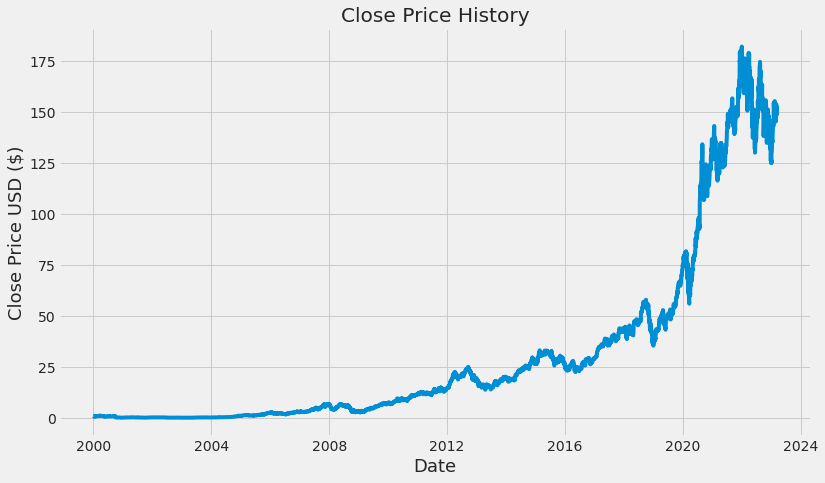

In [80]:
plt.figure(figsize=(12,7))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [81]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

5546

In [82]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00420934],
       [0.00374579],
       [0.00381946],
       ...,
       [0.8264895 ],
       [0.8381522 ],
       [0.84035277]])

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [84]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=1)

172/172 [==============================] - 28s 139ms/step - loss: 0.0013


In [85]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

10/10 [==============================] - 1s 39ms/step


8.059428640922757

<ipython-input-86-6563f516ec06>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


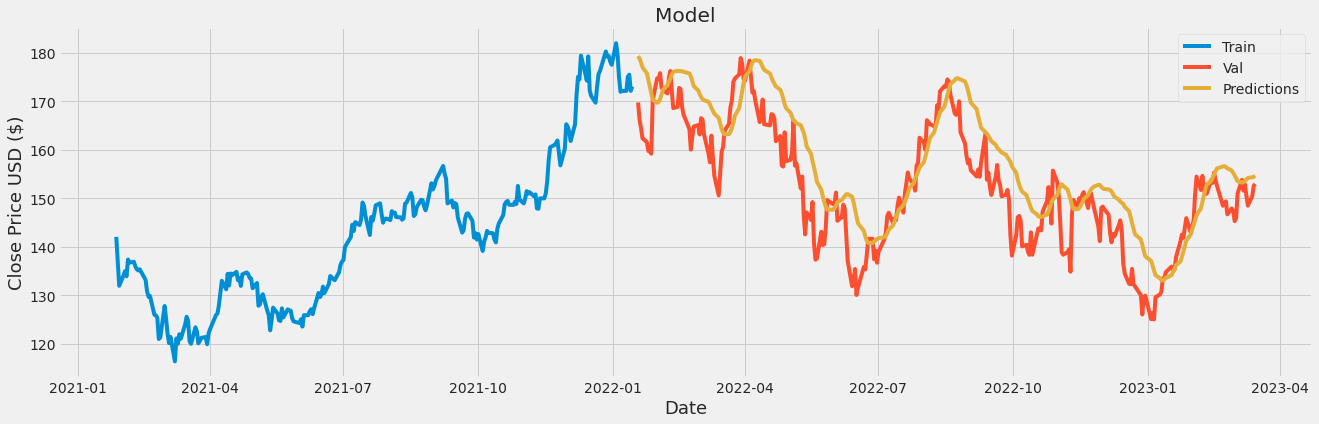

In [86]:
# Plot the data
train = data.iloc[5300:training_data_len, :]
valid = data.iloc[training_data_len:, :]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20, 6))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')

plt.show()